In [1]:
import matplotlib.pyplot as plt
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

C:\Users\Sławek\AppData\Local\Temp\ipykernel_23008\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


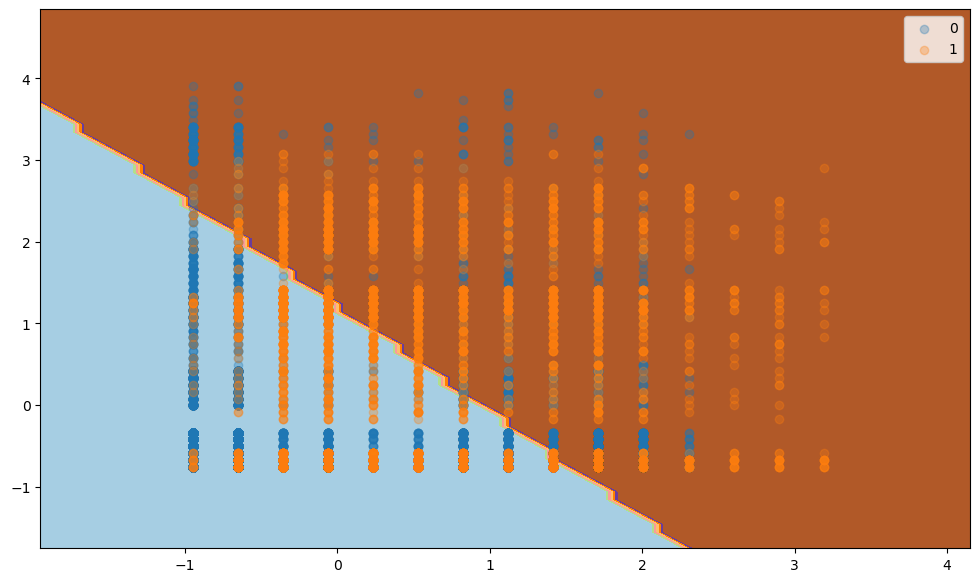

In [4]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [7]:
from sklearn.metrics import  f1_score
predictions_lr_train = model_lr.predict(X_train_standardized)
predictions_lr_test = model_lr.predict(X_test_standardized)

print("F1_score_train:", f1_score(y_train, predictions_lr_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_test))

F1_score_train: 0.5468775476928094
F1_score_test: 0.5809280233832663


C:\Users\Sławek\AppData\Local\Temp\ipykernel_23008\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


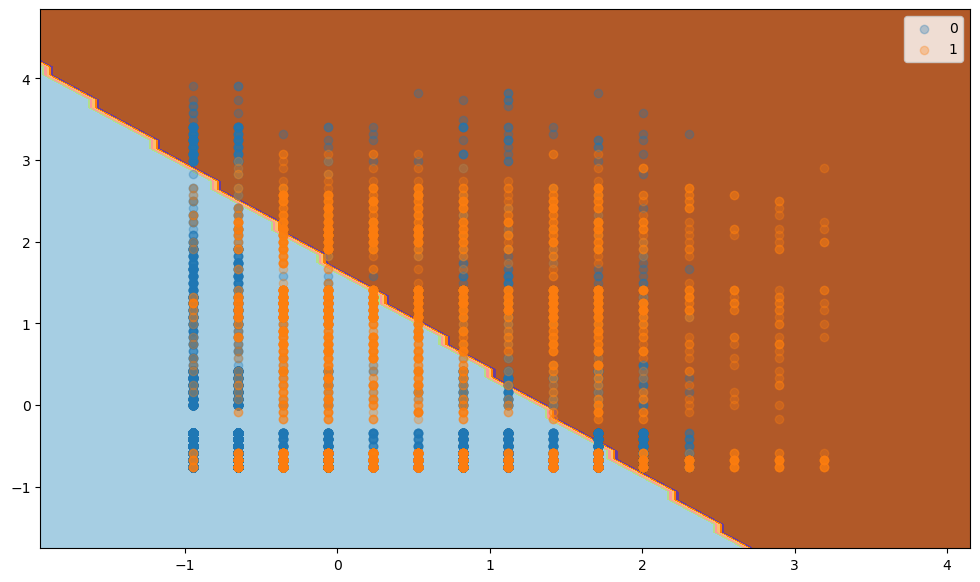

F1_score_train: 0.4692508386134923
F1_score_test: 0.5060949978982766


In [8]:
model_lr_c = LogisticRegression(C=1e-3, solver='saga')
model_lr_c.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_c)
predictions_lr_c_train = model_lr_c.predict(X_train_standardized)
predictions_lr_c_test = model_lr_c.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_c_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_c_test))

Dla penalty='l2' i C bliskiego 0 model ma gorsze parametry

C:\Users\Sławek\AppData\Local\Temp\ipykernel_23008\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


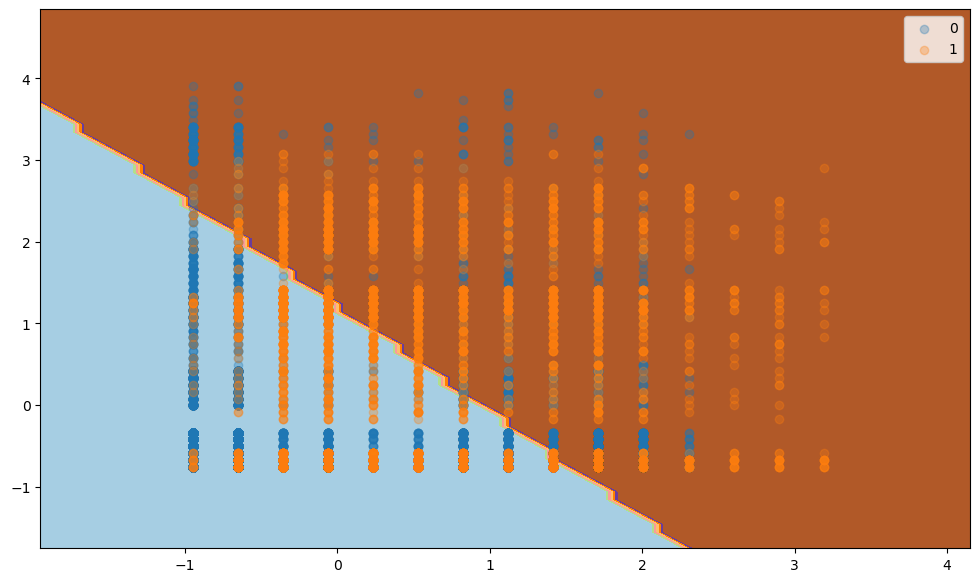

F1_score_train: 0.5468775476928094
F1_score_test: 0.5809280233832663


In [9]:
model_lr_l1 = LogisticRegression(C=1, penalty='l1', solver='saga')
model_lr_l1.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l1)
predictions_lr_l1_train = model_lr_l1.predict(X_train_standardized)
predictions_lr_l1_test = model_lr_l1.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_l1_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_l1_test))

Dla penalty='l1' i C równego 1 model ma takie same parametry jak dla 'l2' dla C równego 1

C:\Users\Sławek\AppData\Local\Temp\ipykernel_23008\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


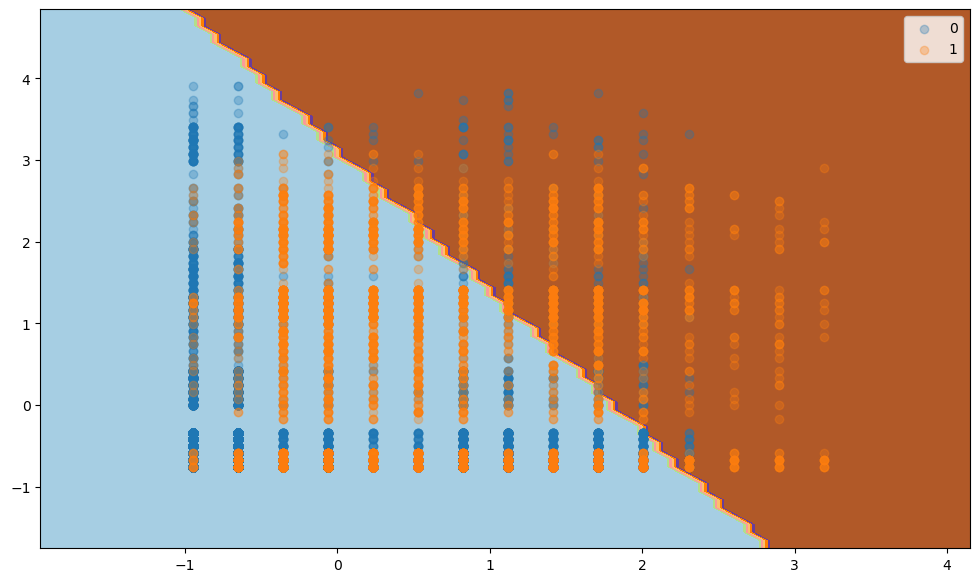

F1_score_train: 0.3126991351843423
F1_score_test: 0.33176347462061745


In [10]:
model_lr_l1 = LogisticRegression(C=1e-3, penalty='l1', solver='saga')
model_lr_l1.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l1)
predictions_lr_l1_train = model_lr_l1.predict(X_train_standardized)
predictions_lr_l1_test = model_lr_l1.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_l1_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_l1_test))

Dla penalty='l1' i C bliskiego 0 model ma gorsze parametry niż dla C = 1 

C:\Users\Sławek\AppData\Local\Temp\ipykernel_23008\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


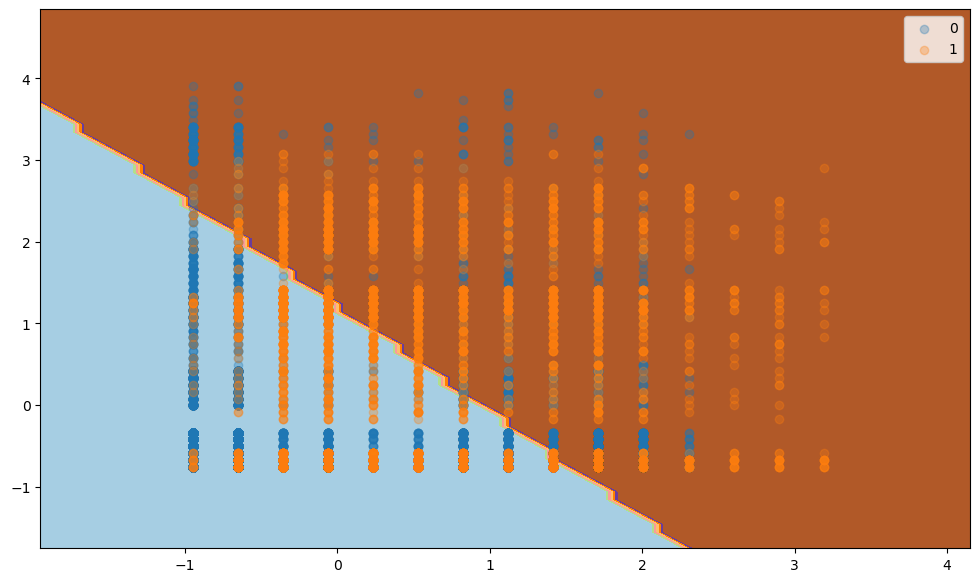

F1_score_train: 0.5468775476928094
F1_score_test: 0.5809280233832663


In [11]:
model_lr_none = LogisticRegression(penalty=None, solver='saga' )
model_lr_none.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_none)
predictions_lr_none_train = model_lr_none.predict(X_train_standardized)
predictions_lr_none_test = model_lr_none.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_none_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_none_test))

Dla penalty=None model ma takie same parametry jak dla 'l2' dla C równego 1

C:\Users\Sławek\AppData\Local\Temp\ipykernel_23008\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


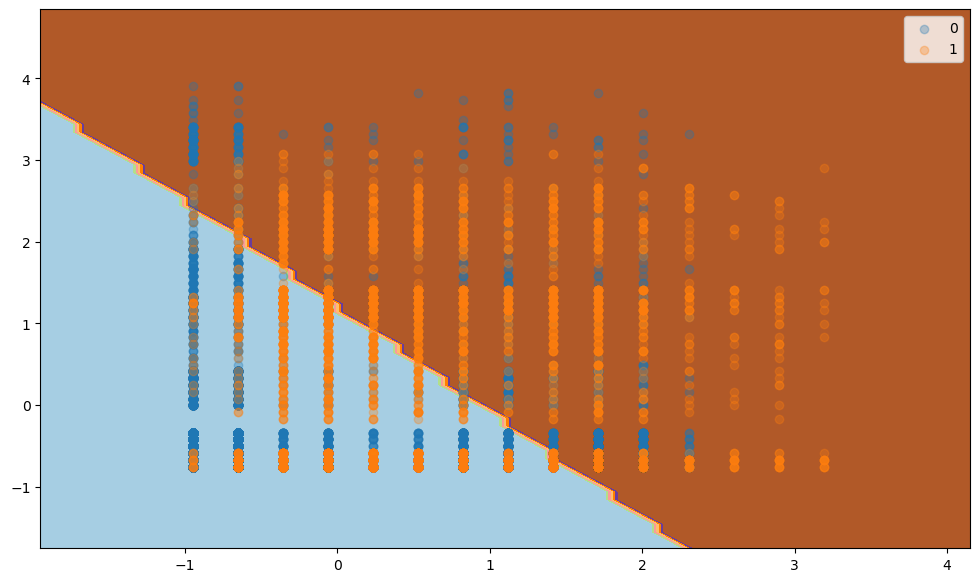

F1_score_train: 0.5468775476928094
F1_score_test: 0.5809280233832663


In [12]:
model_lr_elasticnet = LogisticRegression(C=1, penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_lr_elasticnet.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_elasticnet)
predictions_lr_elasticnet_train = model_lr_elasticnet.predict(X_train_standardized)
predictions_lr_elasticnet_test = model_lr_elasticnet.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_elasticnet_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_elasticnet_test))

penalty='elasticnet' nie wydaje się mieć znaczącego wpływu na wynik (w zależności od l1 ratio)